## 連續型分配

### t 分配

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


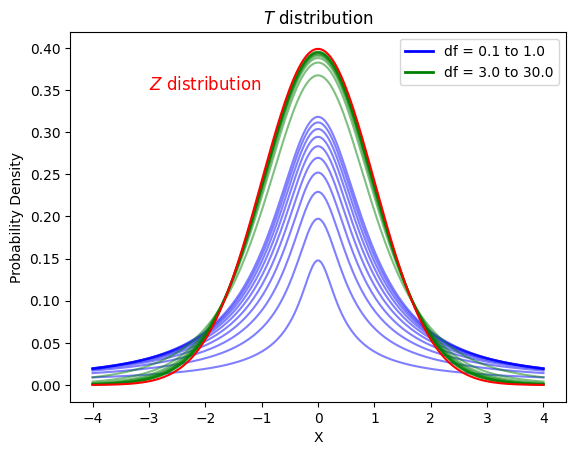

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from matplotlib.lines import Line2D  # 自訂legend

# 自由度
df1 = np.arange(0.1, 1.1, 0.1)
df2 = np.arange(3, 33, 3)
x = np.linspace(-4, 4, 200)
df_array = np.vstack((df1, df2))  # hstack
num_rows, num_columns = df_array.shape

legend_labels = []  # 儲存線段名稱
color_param = ['blue', 'green']
# 繪製 t-分佈的PDF圖表
for i in range(2):
    y = t.pdf(x.reshape(-1, 1), df_array[i, :])
    plt.plot(x, y, color=color_param[i], alpha=0.5)
    legend_labels.append(f'df = {df_array[i, 0]} to {df_array[i, 9]}')

# Z 分佈
y2 = norm.pdf(x, 0, 1)
plt.plot(x, y2, color='red')
plt.text(-3, 0.35, '$Z$ distribution', fontsize=12, color='red')

plt.title(f'$T$ distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
legend_elements = [Line2D([0], [0], color='blue', lw=2, label='Custom Label 1'),
                   Line2D([0], [0], color='green',
                          lw=2, label='Custom Label 2'),
                   Line2D([0], [0], color='red', lw=2, label='Custom Label 3 (Z distribution)')]

plt.legend(handles=legend_elements, labels=legend_labels)

plt.savefig('statcomp_hw3_plot1.eps')

### 卡方分配

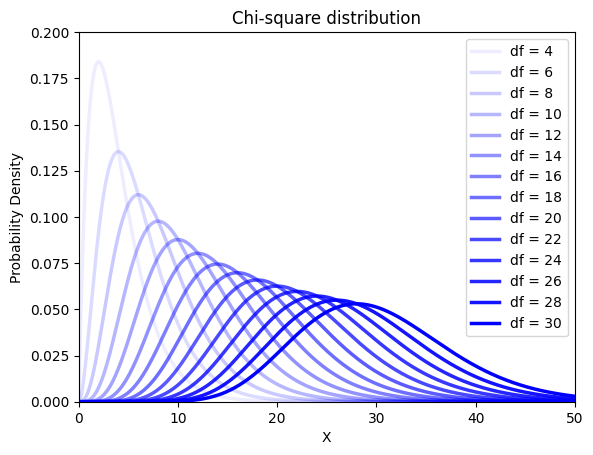

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

xlim = [0, 50]
x = np.linspace(xlim[0], xlim[1], 1000)

df = np.arange(4, 32, 2)

plt.figure()
plt.axis([xlim[0], xlim[1], 0, 0.2])

y = chi2.pdf(x.reshape(-1, 1), df.reshape(1, -1))

# 使用 alpha 控制透明度
for i in range(len(df)):
    alpha = 0.07 + i / len(df)  # 調整 alpha 值
    plt.plot(x, y[:, i], lw=2.5, color='blue',
             alpha=alpha, label=f'df = {df[i]}')

plt.title(f'Chi-square distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()

plt.savefig('statcomp_hw3_plot2.png')

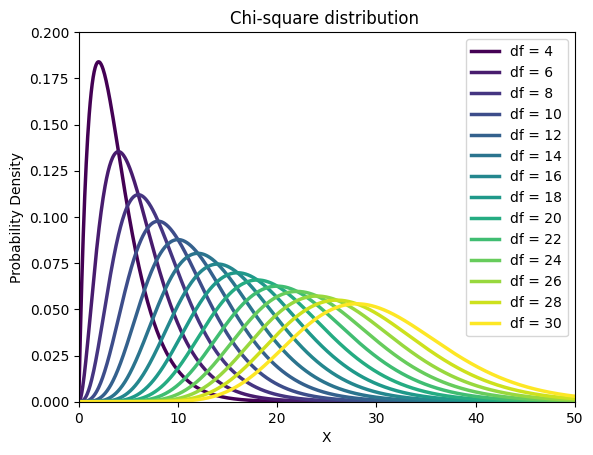

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

xlim = [0, 50]
x = np.linspace(xlim[0], xlim[1], 1000)

df = np.arange(4, 32, 2)

plt.figure()
plt.axis([xlim[0], xlim[1], 0, 0.2])

# 选择色彩映射
colors = plt.cm.viridis(np.linspace(0, 1, len(df)))

for i in range(len(df)):
    plt.plot(x, chi2.pdf(x, df[i]), lw=2.5, color=colors[i], label=f'df = {df[i]}')

plt.title('Chi-square distribution ')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

plt.savefig('statcomp_hw3_plot3.pdf')

### beta 分配

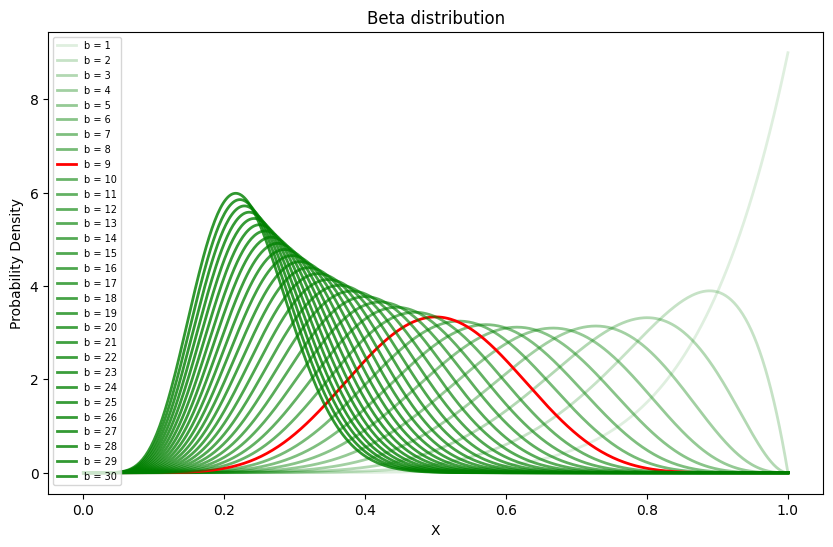

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

a = 9
b_values = np.arange(1, 31)  # b的範圍
x = np.linspace(0, 1, 500)

plt.figure(figsize=(10, 6))
for b in b_values:
    alpha = (b/(b+7))
    y = beta.pdf(x, a, b)
    if b != 9:
        plt.plot(x, y, label=f'b = {b}',
                 color='green', alpha=alpha, linewidth=2)
    else:
        plt.plot(x, y, label=f'b = {b}', color='red', linewidth=2)

plt.legend(fontsize=7, loc='upper left')
plt.title(f'Beta distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')

plt.savefig('statcomp_hw3_plot4.png')

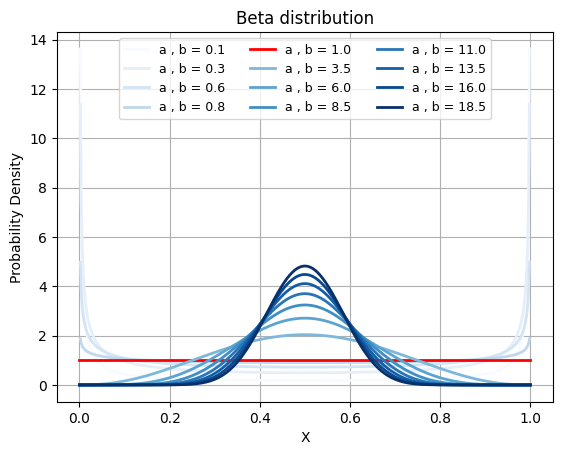

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

x = np.linspace(0, 1, 500)

param_values = np.hstack(
    (np.arange(0.1, 1.1, 0.25), np.arange(1, 11, 2.5), np.arange(11, 21, 2.5))
)
cmap = plt.get_cmap('Blues')  # 選擇藍色調色盤

for i in range(len(param_values)):
    color = cmap(i / (len(param_values) - 1))  # 根據位置選擇顏色
    y = beta.pdf(x, param_values[i], param_values[i])
    if param_values[i] != 1:
        plt.plot(x, y, linewidth=2,
                 label=f'a , b = {param_values[i]:.1f}', color=color)
    else:
        plt.plot(x, y, linewidth=2,
                 label=f'a , b = {param_values[i]:.1f}', color='red')

plt.legend(fontsize=9 , ncol= 3 )
plt.title(f'Beta distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.grid(True)

plt.savefig('statcomp_hw3_plot5.png')

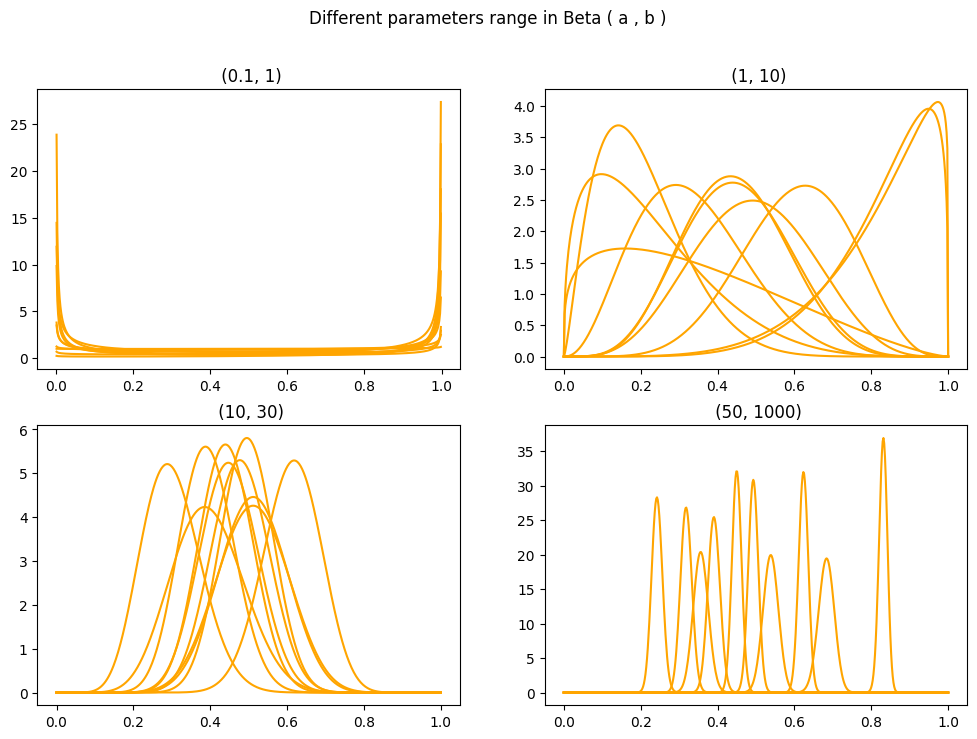

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import random

# 子圖布局2*2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Different parameters range in Beta ( a , b )')

# 四組 均勻分布 的 beta 參數(a,b) 範圍 ， 隨機生成
params = [(0.1, 1), (1, 10), (10, 30), (50, 1000)]

# 迴圈生成
for i, ax in enumerate(axes.ravel()):
    a, b = params[i]
    x = np.linspace(0, 1, 500)
    for j in range(10):
        a_random = np.random.uniform(a, b)
        b_random = np.random.uniform(a, b)
        y = beta.pdf(x, a_random, b_random)
        ax.plot(x, y, color='orange')
    ax.set_title(f' {params[i] }')

plt.savefig('statcomp_hw3_plot6.eps')

Text(0.5, 0.98, 'How the shape of $\\beta(\\alpha,\\beta)$ varies with $(\\alpha,\\beta)$')

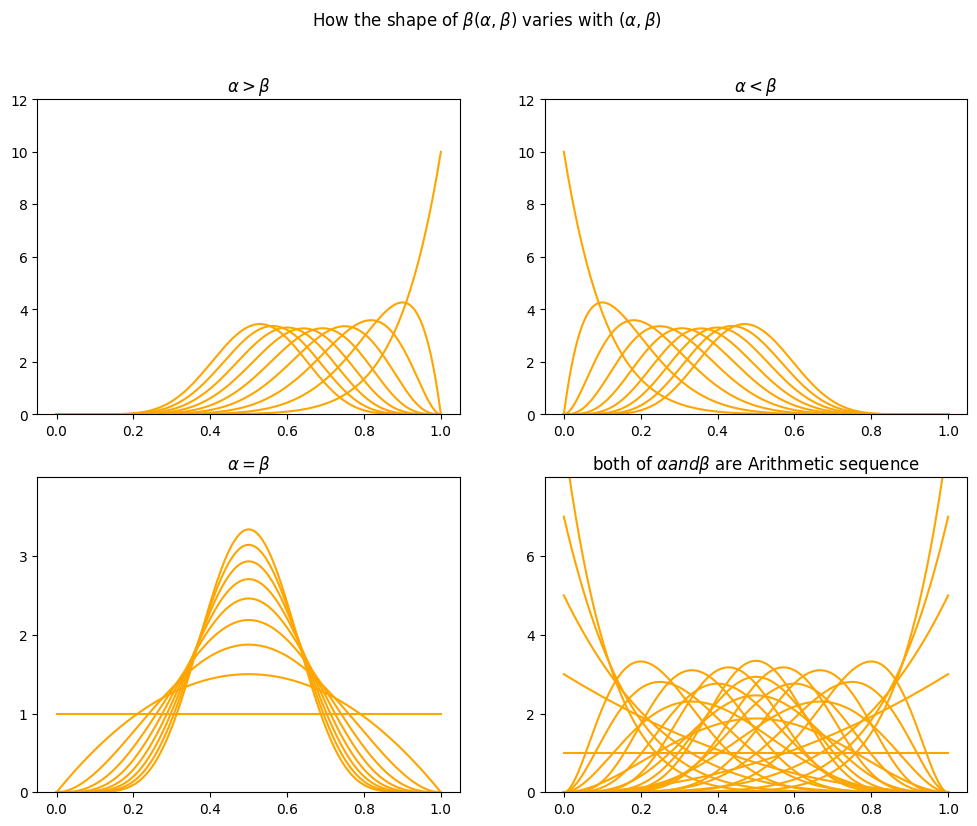

In [7]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.stats import norm,chi2,t,beta,binom 
df0=np.arange(1,10)
x=np.linspace(0,1,300)
fig, ax = plt.subplots(2,2, figsize = [12, 9])
y0=beta.pdf(x.reshape(-1,1),10,df0)
ax[0][0].plot(x,y0,color='orange')
ax[0][0].set_ylim(0,12)
ax[0][0].set_yticks(np.arange(0,13,2))
ax[0][0].set_title('$\\alpha>\\beta$')

y1=beta.pdf(x.reshape(-1,1),df0,10)
ax[0][1].plot(x,y1,color='orange')
ax[0][1].set_ylim(0,12)
ax[0][1].set_yticks(np.arange(0,13,2))
ax[0][1].set_title('$\\alpha<\\beta$')

y2=beta.pdf(x.reshape(-1,1),df0,df0)
ax[1][0].plot(x,y2,color='orange')
ax[1][0].set_ylim(0,4)
ax[1][0].set_yticks(np.arange(0,4))
ax[1][0].set_title('$\\alpha=\\beta$')

a=[1,1,1,1,1,3,3,3,3,3,5,5,5,5,5,7,7,7,7,7,9,9,9,9,9]
b2=np.arange(1,10,2)
nbeta=np.tile(b2,5)
y3=beta.pdf(x.reshape(-1,1),nbeta,a)
ax[1][1].plot(x,y3,color='orange')
ax[1][1].set_ylim(0,8)
ax[1][1].set_yticks(np.arange(0,8,2))
ax[1][1].set_title('both of $\\alpha and \\beta$ are Arithmetic sequence')
plt.suptitle("How the shape of $\\beta(\\alpha,\\beta)$ varies with $(\\alpha,\\beta)$")


### f分配

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


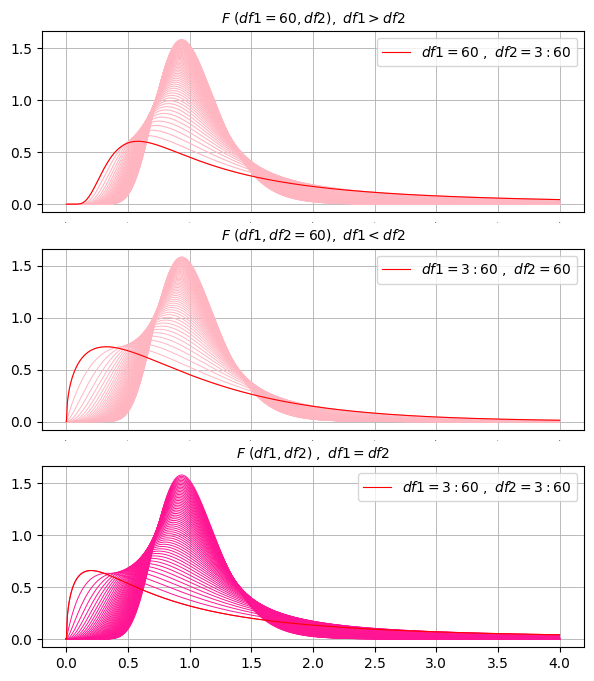

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f

x = np.linspace(0, 4, 500)
df1_values = 60
df2_values = np.arange(3, 60, 1)

fig, ax = plt.subplots(3, 1, figsize=(7, 8))

y = f.pdf(x.reshape(-1, 1), df1_values, df2_values.reshape(1, -1))
y_first = f.pdf(x.reshape(-1, 1), 60, 3)
ax[0].plot(x, y, color='#FFB6C1', linewidth=0.8)
ax[0].grid(True, linewidth=0.6)
y1_min, y1_max = ax[0].get_ylim()  # 第一張子圖 Y 軸範圍
ax[0].tick_params(axis='x', labelsize=0, color='white')
ax[0].set_title(r'$F\ (df1 = 60,df2),\ df1 > df2$', fontsize=10)
ax[0].plot(x, y_first, color='red', linewidth=0.8, label=r'$df1 = 60\ ,\ df2=3:60$')
ax[0].legend(loc='upper right')


y = f.pdf(x.reshape(-1, 1), df2_values.reshape(1, -1), df1_values)
y_first = f.pdf(x.reshape(-1, 1), 3, 60)
ax[1].plot(x, y, color='#FFB6C1', linewidth=0.7)
ax[1].grid(True, linewidth=0.6)
ax[1].set_ylim(y1_min, y1_max)
ax[1].tick_params(axis='x', labelsize=0, color='white')
ax[1].set_title(r'$F\ (df1,df2 = 60),\ df1 < df2$', fontsize=10)
ax[1].plot(x, y_first, color='red', linewidth=0.8, label=r'$df1 = 3:60\ ,\ df2=60$')
ax[1].legend(loc='upper right')

y = f.pdf(x.reshape(-1, 1), df2_values.reshape(1, -1),
          df2_values.reshape(1, -1))
y_first = f.pdf(x.reshape(-1, 1), 3, 3)
ax[2].plot(x, y, color='#FF1493', linewidth=0.7)
ax[2].grid(True, linewidth=0.6)
ax[2].set_ylim(y1_min, y1_max)
ax[2].set_title(r'$F\ (df1,df2)\ ,\ df1 = df2$', fontsize=10)
ax[2].plot(x, y_first, color='red', linewidth=0.8, label=r'$df1 = 3:60\ ,\ df2=3:60$')
ax[2].legend(loc='upper right')

plt.savefig('statcomp_hw3_plot7.eps')

## 離散型分配

### 超幾何分配

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


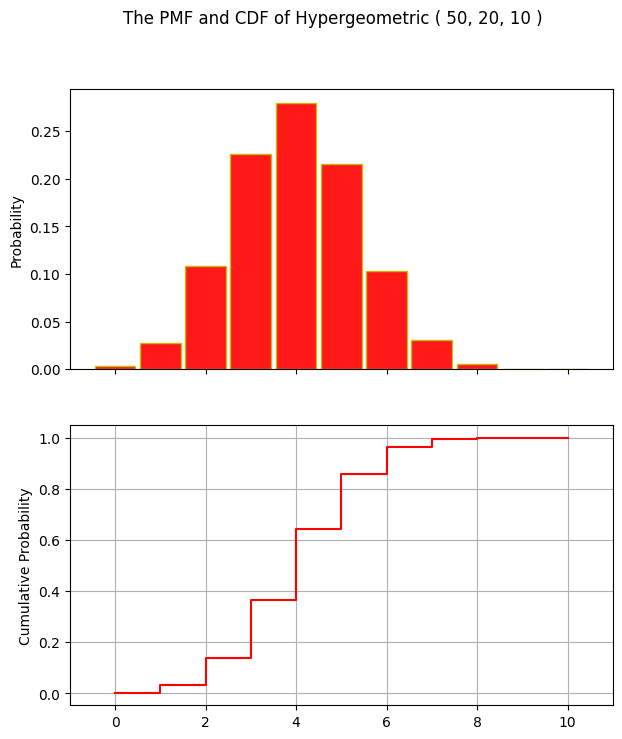

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import hypergeom

# 设置超几何分布的参数 (N, K, n)
N = 50  # 总体大小
K = 20  # 总体中成功的数量
n = 10  # 从总体中抽取的样本大小

# 生成 x 轴的值，范围是从 0 到 n
x = np.arange(0, n + 1)

# 计算 PMF 和 CDF
pmf = hypergeom.pmf(x, N, K, n)
cdf = hypergeom.cdf(x, N, K, n)

fig, ax = plt.subplots(2, 1, sharex='col', figsize=(7, 8))
plt.suptitle('The PMF and CDF of Hypergeometric ( {}, {}, {} )'.format(N, K, n))


ax[0].bar(x, pmf, align='center', alpha=0.9,
          width=0.9, color='r', edgecolor='y')
ax[0].set_ylabel('Probability')


ax[1].step(x, cdf, where='post', label='CDF', color='r')
plt.grid(True)
ax[1].set_ylabel('Cumulative Probability')

plt.savefig('statcomp_hw3_plot8.eps')

### poisson 分配

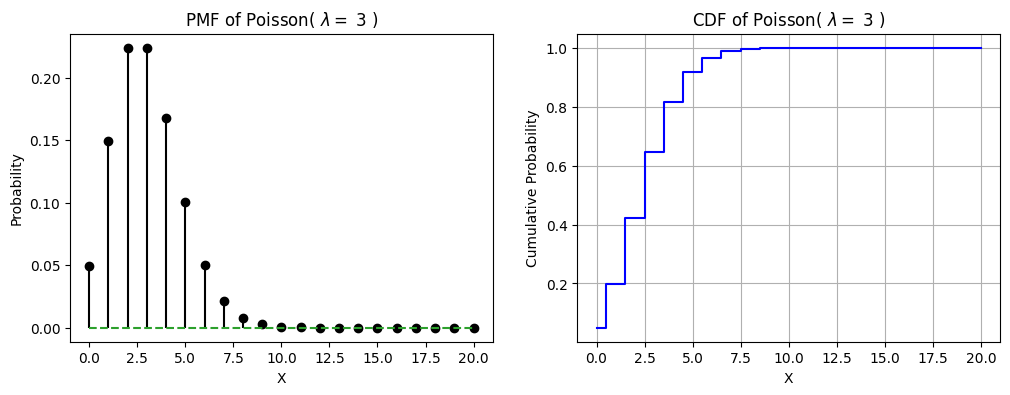

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# poisson 分配參數
lambda_parameter = 3
x = np.arange(0, 21)

pmf = poisson.pmf(x, lambda_parameter)
cdf = poisson.cdf(x, lambda_parameter)

# plt.suptitle('The PMF and CDF of Poisson( $\lambda =$ {} )'.format(lambda_parameter))

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.stem(x, pmf, linefmt='k-', markerfmt='ko', basefmt='C2--')
plt.title('PMF of Poisson( $\lambda =$ {} )'.format(lambda_parameter))
plt.xlabel('X')
plt.ylabel('Probability')

plt.subplot(122)
plt.step(x, cdf, where='mid', label='CDF', color='blue')
plt.title('CDF of Poisson( $\lambda =$ {} )'.format(lambda_parameter))
plt.xlabel('X')
plt.ylabel('Cumulative Probability')
plt.grid(True)

plt.savefig('statcomp_hw3_plot9.eps')

## 亂數產生相關圖形

### 抽樣分配 Sampling Distribution $Y = X^2$
假設隨機變數 X 服從常態分配 N(0, 1)，令 Y = X^2, 則隨機變數 Y 服從 \chi^2 分配且自由度為 1。本範例要藉由隨機抽樣來證實這個知名的定理。做法如下：

1.從常態分配 N(0, 1) 隨機抽取 n 個樣本，並計算每個樣本的平方。  
2.繪製直方圖（貼上真實的 \chi^2(1) 的 PDF 圖）如下圖左上。  
3.繪製 Boxplot, Probability plot 與 ECDF（貼上真實的 CDF 圖），如下圖，作為佐證，尤其是 ECDF 圖與真實 CDF 之相似度，隨樣本數增加而更像。  
4.可以將 ECDF 的計算寫成一個函數，如 ecdf(sample): …. return x, y

注意事項:  
繪製直方圖時，必須留意組距（bins）數的多寡，這將影響觀察的判斷。  
同樣值得注意的是 Y 軸的調整，以便得到較好的觀察視野。當貼上 PDF 線圖時，直方圖必須採用相對頻率。

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


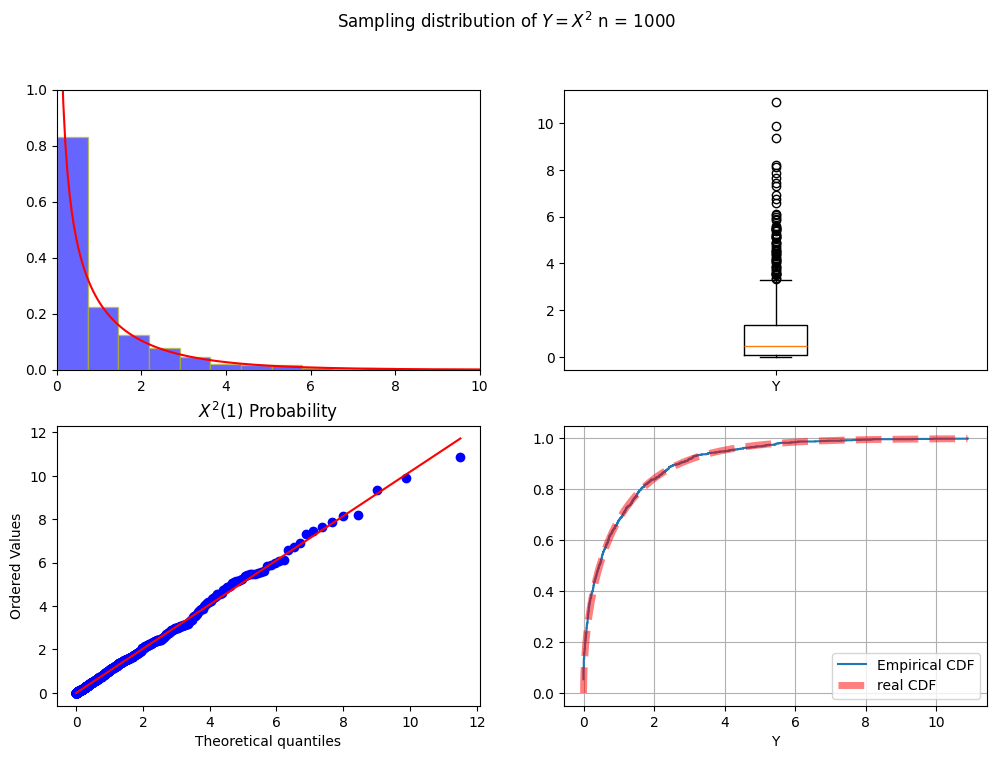

In [11]:
import numpy as np
from scipy.stats import norm , chi2
from scipy.stats import cumfreq  # for ECDF
from scipy import stats
import matplotlib.pyplot as plt

# random number generator with random seed
n = 1000
rng = np.random.default_rng(seed=123)  # (seed=...)
x_norm = rng.normal(0, 1, n)
# x = norm.rvs(loc = 0, scale = 1, size = 1000)
x = np.linspace(0, 50, n)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Sampling distribution of $Y = X^2$ n = 1000')

##
ax[0, 0].hist(x_norm**2, bins=15, alpha=0.6, color='b',
              edgecolor='y', linewidth=1, density=True)

y = chi2.pdf(x, df=1)
ax[0, 0].plot(x, y, color='red')

ax[0, 0].set_ylim(0, 1), ax[0, 0].set_xlim(0, 10)

##
ax[0, 1].boxplot(x_norm**2)

# Set the x-axis labels to "Y"
ax[0, 1].set_xticklabels(["Y"])

##
stats.probplot(x_norm**2, dist=stats.chi2, sparams=(1,), plot=ax[1, 0])
ax[1, 0].set_title('$X^2 (1)$ Probability')

##
num_bins = n  # cumulative frequency over each sample
res = cumfreq(x_norm**2, num_bins)
# print(res.lowerlimit, res.binsize, res.cumcount.size)
x_res = res.lowerlimit + \
    np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)

# ax1.bar(x, res.cumcount/n, width=res.binsize)
ax[1, 1].plot(x_res, res.cumcount/n,
              drawstyle='steps-pre', label='Empirical CDF')

x_sort = np.sort(x_norm**2)
Y_ = chi2.cdf(x_sort, df=1)
ax[1, 1].plot(x_sort, Y_, color='r', linestyle='--',
              linewidth=5, alpha=0.5, label='real CDF')
ax[1, 1].legend()
ax[1, 1].grid(True)
ax[1, 1].set_xlabel('Y')

plt.savefig('statcomp_hw3_plot10.eps')

## 抽樣分配推論

### 中央極限定理驗證

C:\Users\yangs\AppData\Local\Temp\ipykernel_2980\256365870.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


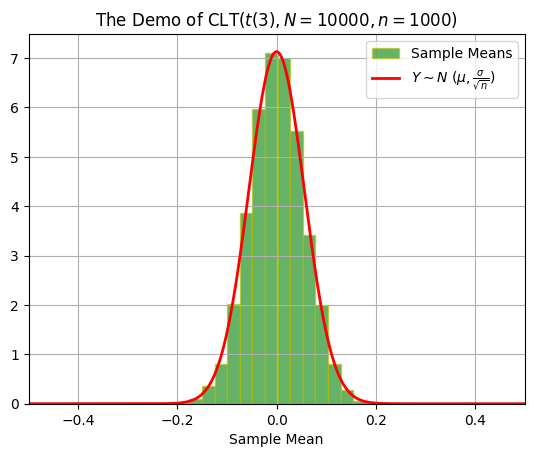

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 設定母體參數
n = 1000
N = 10000
df = 3  # 自由度

# 從 t 分佈抽取樣本並計算樣本平均值
rng = np.random.default_rng(seed=123)
sample = rng.standard_t(df, size=(N, n))
sample_mean = np.mean(sample, axis=1)

# 繪製樣本平均值的直方圖
plt.hist(sample_mean, bins=50, density=True, alpha=0.6,
         color='g', edgecolor='y', label='Sample Means')

# 生成標準正態分佈的 PDF
x = np.linspace(-1, 1, 1000)
pdf = norm.pdf(x, loc=0, scale=np.sqrt(np.var(sample))/(np.sqrt(n)))
plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')

plt.xlabel('Sample Mean')
plt.title('The Demo of CLT($t(3) , N = 10000 , n = 1000$)')
plt.grid(True)
plt.xlim(-0.5, 0.5)
plt.legend()

plt.savefig('statcomp_hw3_plot11.eps')

C:\Users\yangs\AppData\Local\Temp\ipykernel_2980\3183382945.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


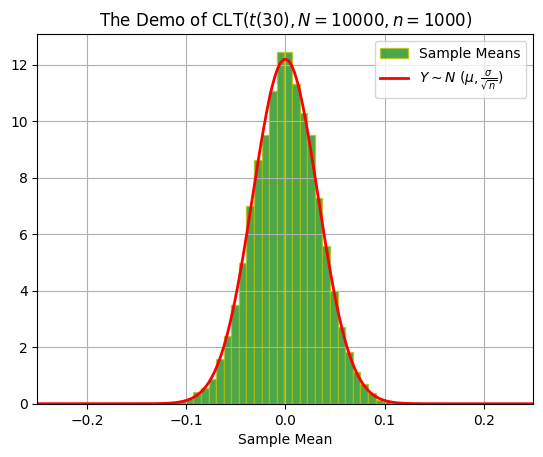

In [13]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 設定母體參數
n = 1000
N = 10000
df = 30  # 自由度

# 從 t 分佈抽取樣本並計算樣本平均值
rng = np.random.default_rng(seed=123)
sample = rng.standard_t(df, size=(N, n))
sample_mean = sample.mean(axis=1)

# 繪製樣本平均值的直方圖
plt.hist(sample_mean, bins=30, density=True, alpha=0.7,
         color='g', edgecolor='y', label='Sample Means')

# 生成標準正態分佈的 PDF
x = np.linspace(-1, 1, 1000)
pdf = norm.pdf(x, 0, np.sqrt(np.var(sample))/(np.sqrt(n)))
plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')

plt.xlabel('Sample Mean')
# plt.ylabel()
plt.title('The Demo of CLT($t(30) , N = {} , n = {} $)'.format(N, n))
plt.grid(True)
plt.xlim(-0.25, 0.25)
plt.legend()

plt.savefig('statcomp_hw3_plot12.eps')

C:\Users\yangs\AppData\Local\Temp\ipykernel_2980\328608955.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


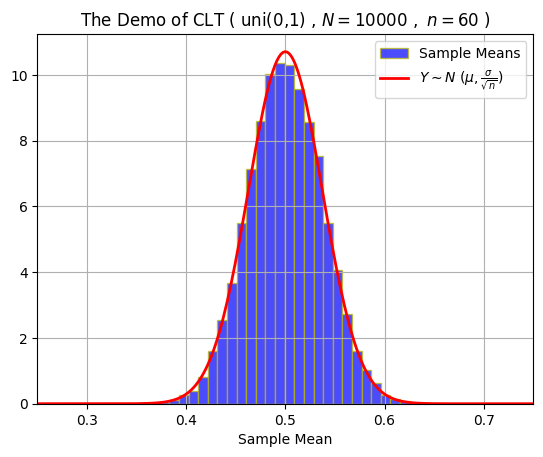

In [14]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 設定母體參數
n = 60
N = 10000

# 從 t 分佈抽取樣本並計算樣本平均值
rng = np.random.default_rng(seed=123)
sample = rng.uniform(0, 1, size=(N, n))
sample_mean = sample.mean(axis=1)

# 繪製樣本平均值的直方圖
plt.hist(sample_mean, bins=30, density=True, alpha=0.7,
         color='b', edgecolor='y', label='Sample Means')

# 生成標準正態分佈的 PDF
x = np.linspace(-1, 1, 1000)
pdf = norm.pdf(x, loc=1/2, scale=np.sqrt(1/12)/np.sqrt(n))
plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')

plt.xlabel('Sample Mean')
plt.title(r'The Demo of CLT ( uni(0,1) , $N = {}\ ,\ n = {} $ )'.format(N, n))
plt.xlim(0.25, 0.75)
plt.legend()
plt.grid(True)

plt.savefig('statcomp_hw3_plot13.eps')

C:\Users\yangs\AppData\Local\Temp\ipykernel_2980\2188072366.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


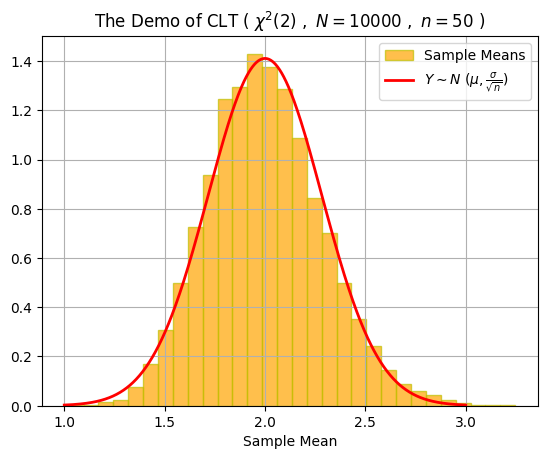

In [15]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 設定母體參數
n = 50
N = 10000
df = 2

# 從 t 分佈抽取樣本並計算樣本平均值
rng = np.random.default_rng(seed=123)
sample = rng.chisquare(df , size=(N, n))
sample_mean = sample.mean(axis=1)

# 繪製樣本平均值的直方圖
plt.hist(sample_mean, bins=30, density=True, alpha=0.7,
         color='orange', edgecolor='y', label='Sample Means')

# 生成標準正態分佈的 PDF
x = np.linspace(1, 3, 1000)
pdf = norm.pdf(x, loc = 2, scale = np.sqrt(2*df)/np.sqrt(n))
plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')

plt.xlabel('Sample Mean')
plt.title(r'The Demo of CLT ( $\chi^2(2)\ ,\ N = {}\ ,\ n = {} $ )'.format(N, n))
plt.grid(True)
plt.legend()

plt.savefig('statcomp_hw3_plot14.eps')

C:\Users\yangs\AppData\Local\Temp\ipykernel_2980\3455394766.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


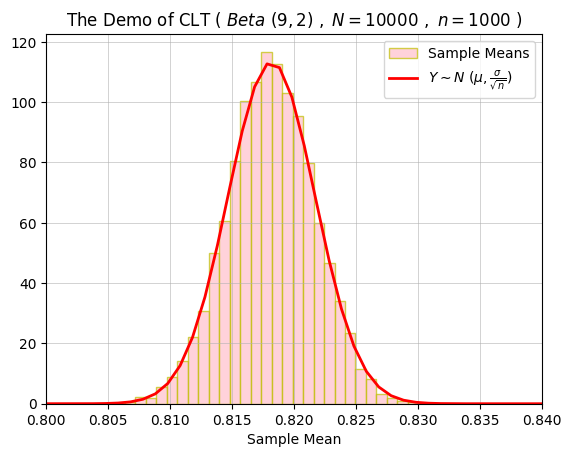

In [16]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 設定母體參數
n = 1000
N = 10000
a,b = 9,2

# 從 t 分佈抽取樣本並計算樣本平均值
rng = np.random.default_rng(seed=123)
sample = rng.beta(a=a , b=b , size=(N, n))
sample_mean = sample.mean(axis=1)

# 繪製樣本平均值的直方圖
plt.hist(sample_mean, bins=30, density=True, alpha=0.7,
         color='PINK', edgecolor='y', label='Sample Means')

# 生成標準正態分佈的 PDF
x = np.linspace(0,1, 1000)

pdf = norm.pdf(x, loc = a/(a+b), scale = np.sqrt((a*b)/(((a+b)**2)*(a+b+1)))/np.sqrt(n) ) #乘除法括號問題(先後順序)
plt.plot(x, pdf, 'k', linewidth=2, color='r', label=r'$Y \sim N\ (\mu, \frac{\sigma}{\sqrt{n}})$')

plt.xlabel('Sample Mean')
plt.title(r'The Demo of CLT ( $Beta\ ({},{})\ ,\ N = {}\ ,\ n = {} $ )'.format(a , b , N , n))
plt.grid(True , linewidth =0.4)
plt.xlim(0.8, 0.84)
plt.legend()

plt.savefig('statcomp_hw3_plot15.eps')

### 中央極限定理實驗結果觀察 ($Y \sim N(\mu , \sigma/\sqrt{n})$)，看 n 與 $\mu 、 \sigma$ 關係

1. t 分配 不同 n 與 $\mu 、 \sigma$ 關係

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


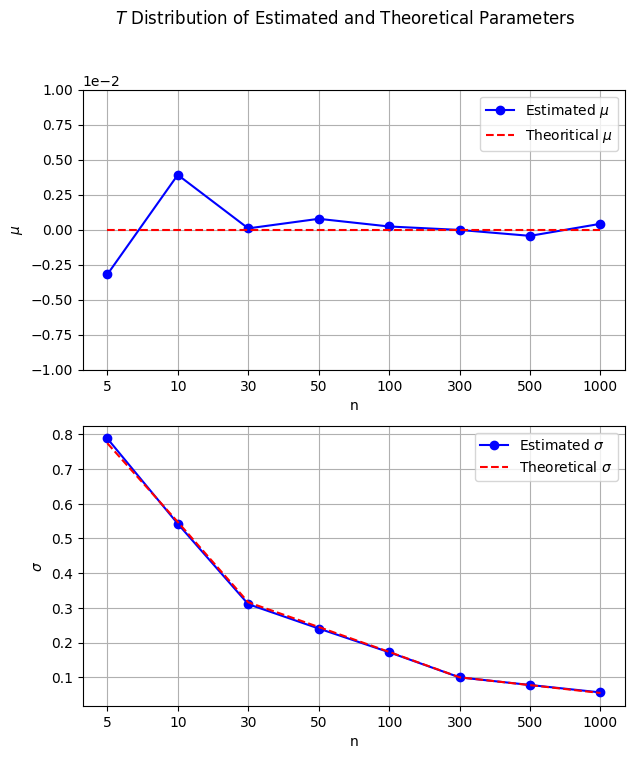

In [17]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# 设置母体参数
n = np.array([5, 10, 30, 50, 100, 300, 500, 1000])
N = 10000
df = 3  # 自由度

mu = np.zeros(len(n))
theo_std = np.zeros(len(n))
estimated_std = np.zeros(len(n))
for i in range(len(n)):
    rng = np.random.default_rng(seed=123)
    sample = rng.standard_t(df, size=(N, n[i]))
    sample_means = np.mean(sample , axis = 1)#
    estimated_std[i] = np.std(sample_means)
    # if n[i] < 30 :
    #     rng = np.random.default_rng(seed=123)
    #     sample = rng.standard_t(df, size=(N, n[i]))
    #     sample_means = np.mean(sample , axis = 1)#
    #     estimated_std[i] = np.std(sample_means)
    # else:
    #     rng = np.random.default_rng(seed=123)
    #     sample = rng.normal(0,1, size=(N, n[i]))
    #     sample_means = np.mean(sample , axis = 1)
    #     estimated_std[i] = np.std(sample_means)
    mu[i] = np.mean(sample_means) #
    theo_std[i] = np.sqrt(df/(n[i]*(df-2))) #

# 分配参数
real_mu = np.zeros(len(n))

# 绘制折线图
fig, ax = plt.subplots(2, 1, figsize=(7, 8))
fig.suptitle('$T$ Distribution of Estimated and Theoretical Parameters')

ax[0].plot(n.astype('str'), mu, label='Estimated $\mu$',color='b' ,marker='o')
ax[0].plot(n.astype('str'), real_mu, label='Theoritical $\mu$',color='r' ,linestyle='--')
ax[0].set_ylim(-0.01, 0.01)
# 使用科学记号表示法
ax[0].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax[0].set_xlabel('n')
ax[0].set_ylabel('$\mu$')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(n.astype(str), estimated_std, label='Estimated $\sigma$', color='b', marker='o')
ax[1].plot(n.astype(str), theo_std, label='Theoretical $\sigma$', color='r', linestyle='--')
#ax[1].set_ylim(0, 0.2)
# ax[1].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax[1].set_xlabel('n')
ax[1].set_ylabel('$\sigma$')
ax[1].grid(True)
ax[1].legend()

plt.savefig('statcomp_hw3_plot16.eps')

### 卡方分配可加性 ( $Y =\chi^2(2)+\chi^2(3)+\chi^2(4) \sim \chi^2(9)$ )

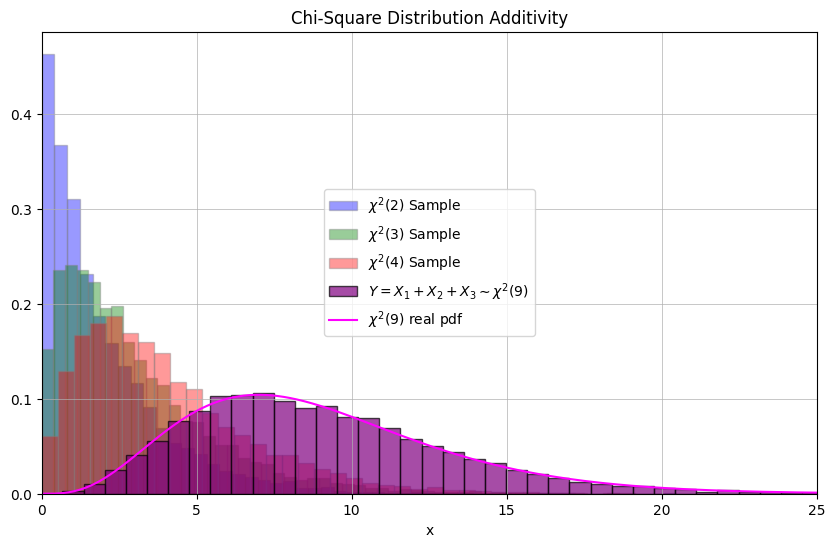

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2

# 設定卡方分佈的自由度
df = [2, 3, 4]
df_sum = np.sum(df)

# 生成卡方分佈的隨機樣本
sample_size = 10000  # 抽樣大小
samples = [chi2.rvs(df=d, size=sample_size) for d in df]

# 將三個卡方分佈的隨機樣本相加
sum_samples = np.sum(samples, axis=0) #列相加

# 繪製卡方分佈的直方圖
plt.figure(figsize=(10, 6))
for i, d in enumerate(df):
    plt.hist(samples[i], bins=50, density=True, alpha=0.4, label=f'$\chi^2({d})$ Sample',
     color=['blue', 'green', 'red'][i] ,edgecolor='gray')
plt.hist(sum_samples, bins=50, density=True, alpha=0.7, label=f'$Y=X_1+X_2+X_3 \sim  \chi^2({df_sum})$',
          color='purple',edgecolor='black')


# 計算自由度為 9 的卡方分佈 PDF
x = np.linspace(0, 30, 1000)
pdf_chi2_9 = chi2.pdf(x, df=9)

# 繪製近似卡方分佈自由度為 9 的 PDF
plt.plot(x, pdf_chi2_9, label='$\chi^2(9)$ real pdf ', 
         color='#FF00FF')

plt.title('Chi-Square Distribution Additivity')
plt.xlabel('x')
plt.legend()
plt.xlim(0,25)
plt.legend(loc='center')
plt.grid(True , linewidth = 0.5)

plt.savefig('statcomp_hw3_plot17.png')

### 負二項分配可加性

[array([31, 33, 43, ..., 22, 25, 26], dtype=int64), array([19, 16, 24, ..., 30, 22, 14], dtype=int64), array([ 6, 14, 10, ...,  7,  6,  3], dtype=int64)]


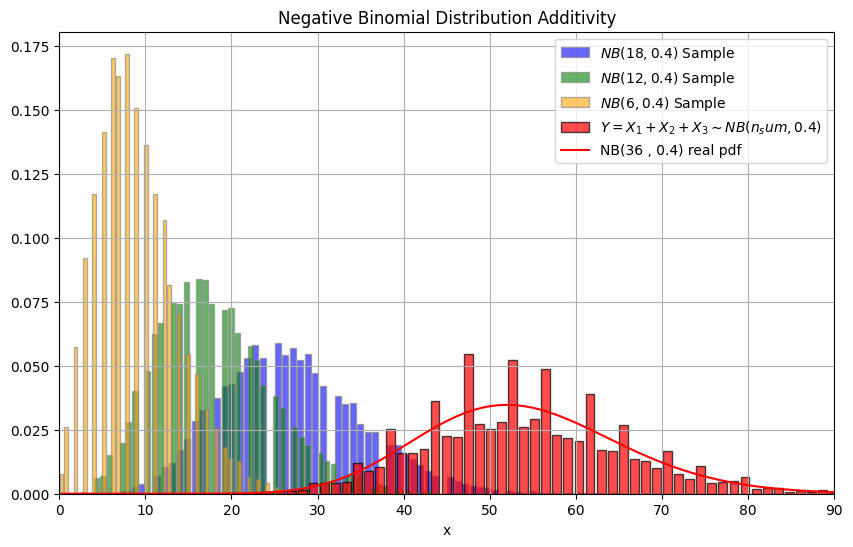

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import nbinom

# 设置负二项分布的参数
n = [18,12,6] # 第n次成功前所作次数
p = 0.4  # 成功的概率(兩個隨機變數的機率要一樣)
sample_size = 10000
# 生成三个独立的负二项分布随机变量
rng = np.random.default_rng(seed=129)
nbinom_samples = [rng.negative_binomial(n_times, p, size=sample_size) for n_times in n]

print(nbinom_samples)

# 将三个分布的随机变量相加
sum_samples = np.sum(nbinom_samples, axis=0)
n_sum = np.sum(n , axis = 0)

# 绘制原始负二项分布的直方图
plt.figure(figsize=(10, 6))
for i in range(len(n)):
    plt.hist(nbinom_samples[i], bins=70, density=True, alpha=0.6, label=f'$NB({n[i]} , {p})$ Sample'
             ,color=['blue', 'green', 'orange'][i], edgecolor='gray',rwidth = 0.8)
plt.hist(sum_samples, bins=70, density=True, alpha=0.7, label=f'$Y=X_1+X_2+X_3 \sim NB(n_sum , {p})$'
         , color='red', edgecolor='black',rwidth = 0.8)

# 计算相加后的负二项分布的参数
nbinom_pdf = nbinom.pmf(np.arange(0, max(sum_samples) + 1), n_sum, p) #因為是次數(正整數)所以用arange，且可以做到無限次

# 绘制相加后的负二项分布的 PDF
plt.plot(np.arange(0, len(nbinom_pdf)), nbinom_pdf, label=f'NB({n_sum} , {p}) real pdf', color='r')

plt.title('Negative Binomial Distribution Additivity')
plt.xlabel('x')
plt.xlim(0,90)
plt.legend()
plt.grid(True)

plt.savefig('statcomp_hw3_plot18.png')

### F分配由兩個卡方分配推導  
$X_1\sim \chi^2(r_1) \coprod X_2\sim \chi^2(r_2) \ ,\ Y = \frac{X_1/r_1}{X_2/r_2} \sim F(r_1,r_2)$

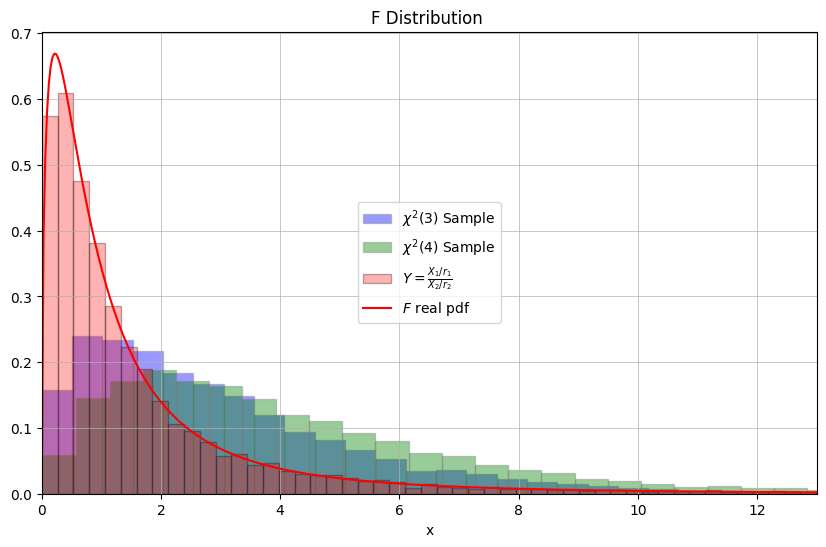

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2 , f

# 設定卡方分佈的自由度
df = [3 , 4]

# 生成卡方分佈的隨機樣本
sample_size = 10000  # 抽樣大小
samples = [chi2.rvs(df=d, size=sample_size) for d in df]

#變數變換
new_samples = (samples[0]/df[0])/(samples[1]/df[1]) #0開始
# 繪製卡方分佈的直方圖
plt.figure(figsize=(10, 6))

for i, d in enumerate(df):
    plt.hist(samples[i], bins=50, density=True, alpha=0.4, label=f'$\chi^2({d})$ Sample',
     color=['blue', 'green'][i] ,edgecolor='gray')
plt.hist(new_samples, bins=800, density=True, alpha=0.3, label=r'$Y = \frac{X_1/r_1}{X_2/r_2}$',
          color='red',edgecolor='black')

# 計算 F 分佈 PDF
x = np.linspace(0, 30, 1000)
pdf = f.pdf(x , dfn = df[0] , dfd = df[1])
# 繪製近似 F PDF
plt.plot(x, pdf, label='$F$ real pdf', color='r')

plt.xlim(0,13)
plt.title('F Distribution ')
plt.xlabel('x')
plt.grid(True , linewidth = 0.5)
plt.legend(loc = 'center')

plt.savefig('statcomp_hw3_plot19.png')

## 講義 Lesson 6 隨機亂數與相關圖形 習題2 

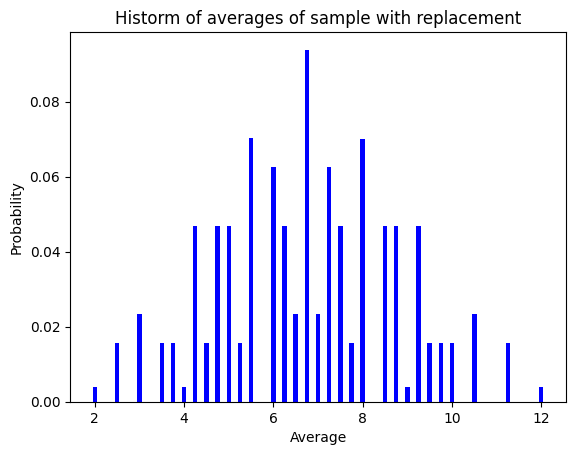

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 給定數字
numbers = np.array([2, 4, 9, 12])
n_samples = 10000000  # 抽樣次數

# 從數字中取後放回抽樣四個數字
rng = np.random.default_rng(seed=11)
sampled_numbers = rng.choice(numbers, size=(n_samples,4), replace=True)
# 計算平均值並添加到列表中
sampled_means = np.mean(sampled_numbers , axis = 1)

# 使用 numpy.unique 來找出不重複的平均值
unique_means, counts = np.unique(sampled_means, return_counts=True)

# 計算每個平均值的概率
pmf = counts / n_samples

# 繪製PMF
plt.bar(unique_means, pmf, width=0.1 ,color='b')
plt.title('Historm of averages of sample with replacement')
plt.xlabel('Average')
plt.ylabel('Probability')

# Remove upper and right frame lines
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)

plt.savefig('statcomp_hw3_plot20.eps')